# Predicting Heart Disease using Machine Learning Algorithms

This notebook looks into using various Python based Machine Learning and Data Science liraries in an attempt to build a Machine learning model capable of predicting whether or not someone has heart disease based oin their medical attributes.

We're going to take the following approach
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation



In [1]:
## Preparing the tools (Importing all the libraries / tools needed at once)

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Model from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
## Loading the data

df = pd.read_csv("heart-disease.csv")
df.shape # rows and columns

(303, 14)

In [3]:
## Data Exploration (explanatory data analysis or EDA)
# The goal here is to find out more about the data and become the subject matter expert of the data set we're working with.
# 1. What questions are we trying to solve ?
# 2. What kind of data do we have and how do we treat different types ?
# 3. What's missing from the data and how do you deal with it ?
# 4. Where are the outliers and why should we care about them ?
# 5. How can we add, remove or change features to get more of the data ?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
## Lets find out how many of each class there.
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

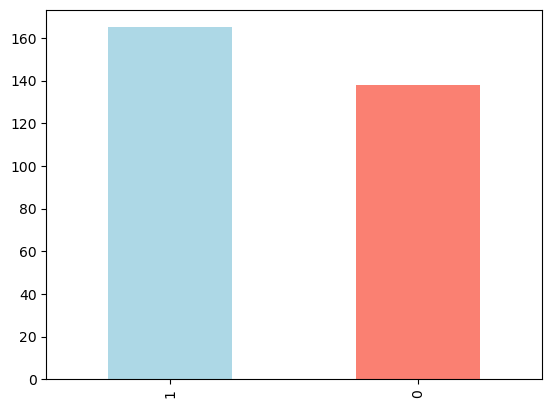

In [7]:
df["target"].value_counts().plot(kind = "bar", color = ["lightblue", "salmon" ]);

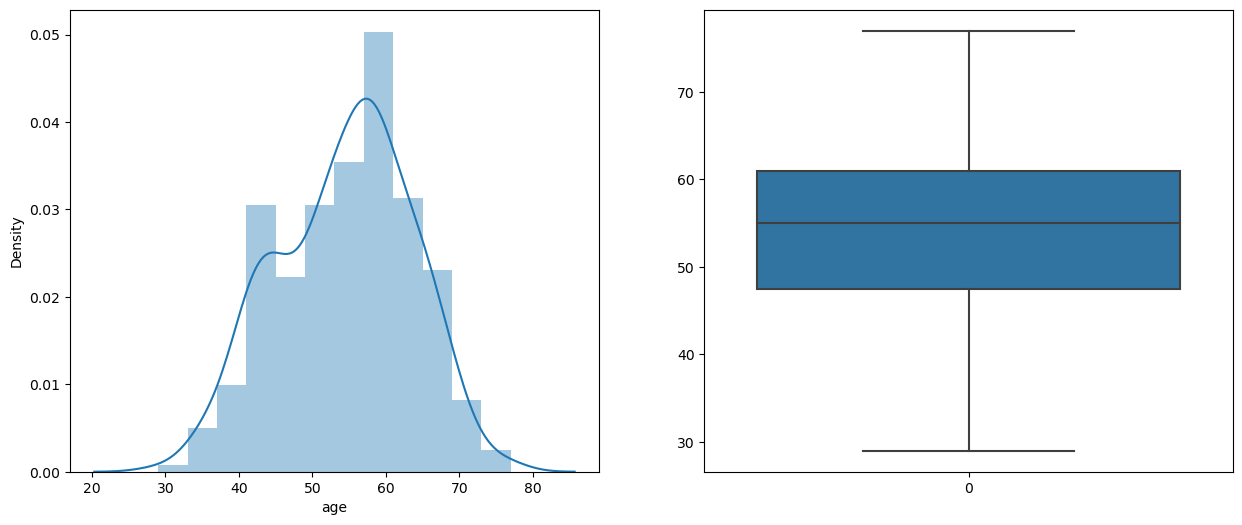

In [8]:
#Univariate analysis age
f = plt.figure(figsize=(15,6))
f.add_subplot(1,2,1)
sns.distplot(df['age'])
f.add_subplot(1,2,2)
sns.boxplot(df['age']);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Are there any missing values ?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
# Heart disease frequency according to sex
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
# Comparing the target column with sex column
pd.crosstab(df["target"], df["sex"]) # we can also use pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [14]:
# If we take a look on the above we can say that almost 70% of females are positive to having heart disease from the 
# total 96 and almost half of the males are positive to having heart disease. If we look at the average of it then a total 
# 60% of our data set is positive with heart disease.

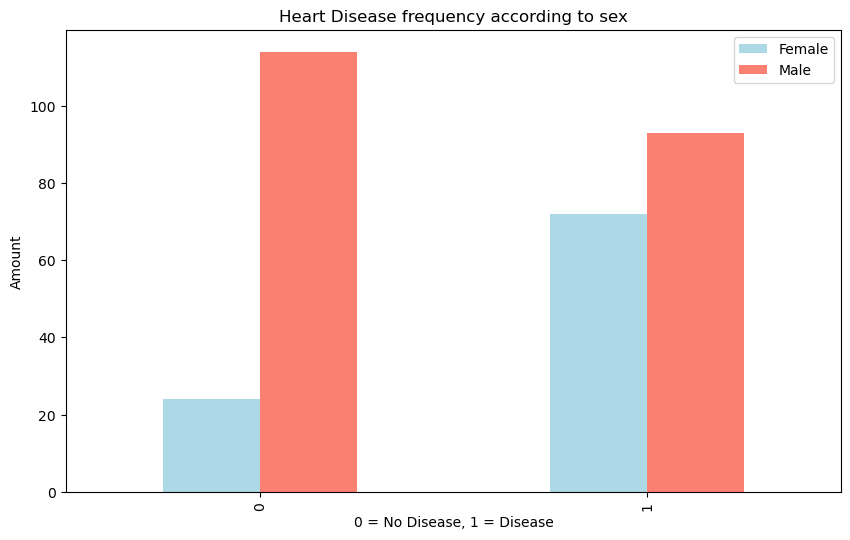

In [15]:
# Creating a plot for the above comparision for better visualization
pd.crosstab(df.target, df.sex).plot(kind = "bar", figsize = (10, 6), color = ["lightblue", "salmon"])

plt.title("Heart Disease frequency according to sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.show()

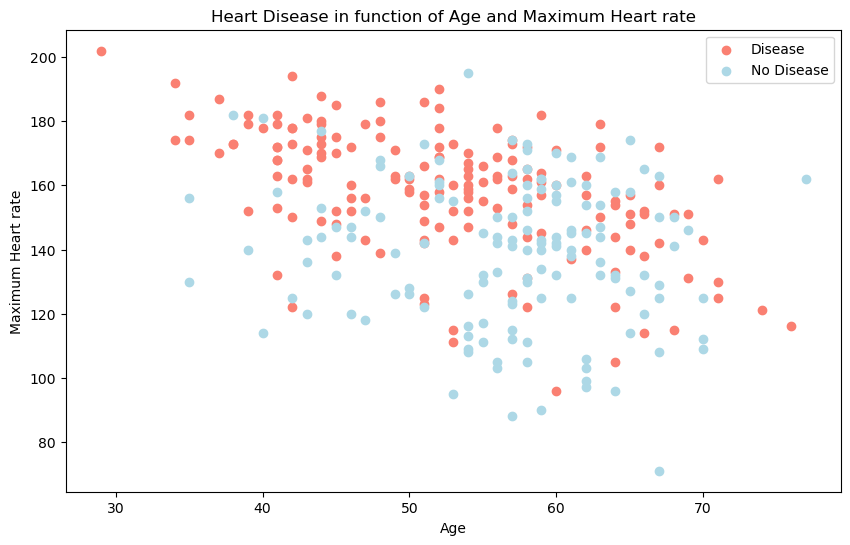

In [16]:
# thalach = maximum heart rate achieved
# Age vs. max Heart rate for Heart Disease

# Lets create another plot
plt.figure(figsize = (10, 6))

# scatter plot with positive examples
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c = "salmon")

# scatter plot with negative examples
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c  = "lightblue")

# add some info 
plt.title("Heart Disease in function of Age and Maximum Heart rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart rate")
plt.legend(["Disease", "No Disease"]);

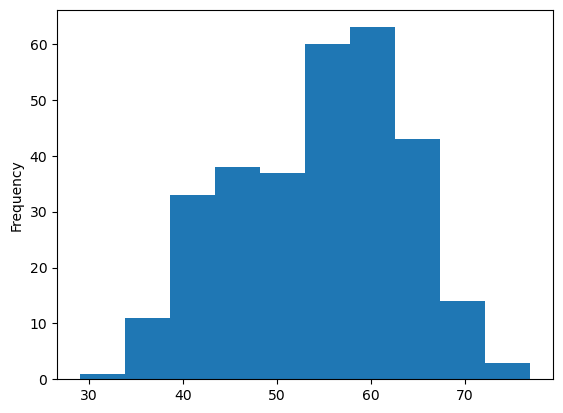

In [17]:
# Checking the distribution of the age column with a histogram
df["age"].plot.hist();

In [18]:
## Heart Disease Frequency per Chest pain Type
# 0 = Typical Agina - chest pain related to decreased blood pressure to the heart
# 1 = Atypical Agina - chest pain not related to heart
# 2 = Non -Aginal Pain - typically esophageal spasms (non-heart related)
# 3 = Asymptomatic Pain -  chest pain not showing signs of disease

In [19]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


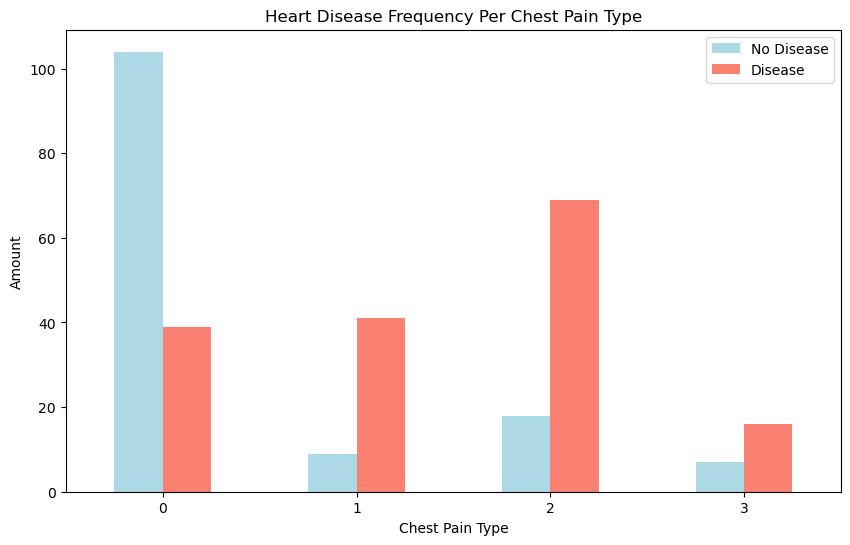

In [20]:
# Making the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind = "bar", figsize = (10, 6), color = ["lightblue", "salmon"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [21]:
# Lets make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


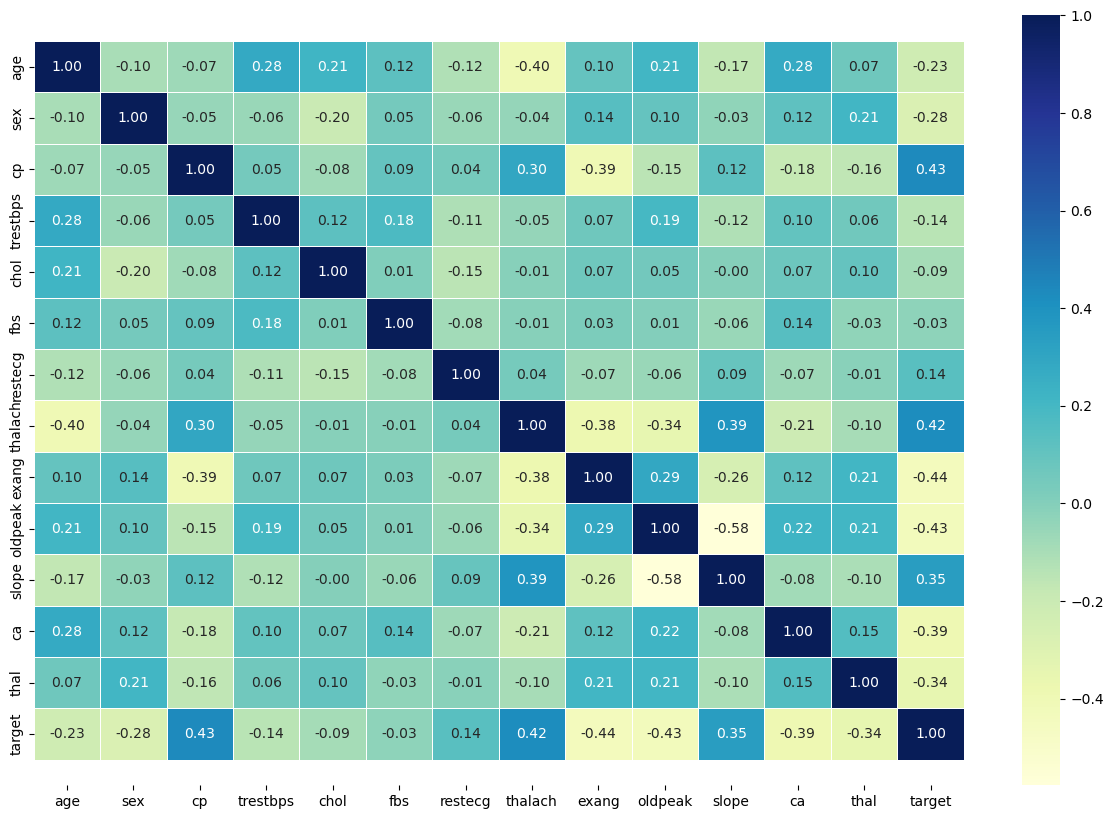

In [22]:
# Lets use Seaborn Heat map for the above
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix, annot = True, linewidths = 0.5, fmt = ".2f", cmap = "YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [23]:
## Modelling
## note : we want minimum 95% of accuracy in our model

# setting the random seed
np.random.seed(42)

# Lets split the data in x and y
x = df.drop("target", axis = 1)

y = df["target"]

# Split into train and test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# let's build a machine learning model
# 1. Train the model (find the patterns)
# 2. Test the model (use the patters)

In [24]:
# lets out the model in a dictionary
models = {"Logistic_Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random_Forest": RandomForestClassifier()}

# Now lets create a function to fit and score our data
def fit_score(models, x_train, x_test, y_train, y_test):
    """
    Fit and evaluate a given machine learning model.
    models = a dictionary from different scikit learn machine learning models
    x_train = training data
    x_test = testing data
    y_train = training labels
    y_test = testing labels
    """
    # setting the random seed
    np.random.seed(42)
    # make a dictionary to keep a model score
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fit the model
        model.fit(x_train, y_train)
        # evaluate the model an append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [25]:
model_scores = fit_score(models = models, x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test)

model_scores

{'Logistic_Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random_Forest': 0.8360655737704918}

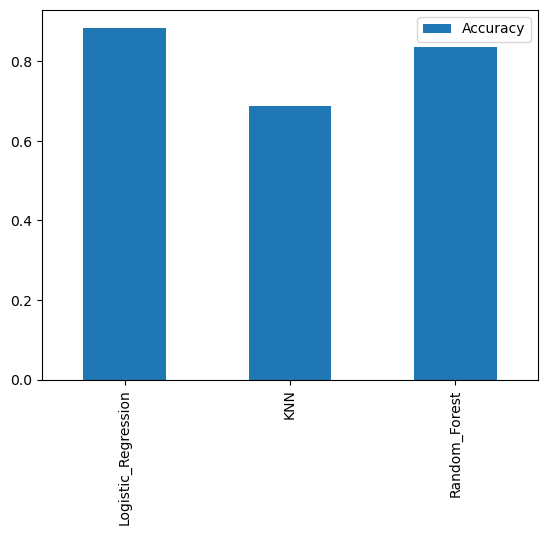

In [26]:
## lets compare our models
model_compare = pd.DataFrame(model_scores, index = ["Accuracy"])
model_compare.T.plot.bar();

In [27]:
# so now lets look at the below points
# 1. Hyperparameters
# 2. Feature importance
# 3. Confusion matric
# 4. Cros validation
# 5. Precision
# 6. Recall
# 7. F1 score
# 8. Classification report
# 9. ROC curve
# 10 Area under curve (AUC)

In [28]:
# Lets tune KNN

train_scores = []
test_scores = []

## Creating a list of different values for n_neighbors
neighbors = range(1, 21)

# Set up KNN instance
knn = KNeighborsClassifier()

# Loop through different n_nieghbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update test scores list
    test_scores.append(knn.score(x_test, y_test))

Maximum KNN score on the test data: 75.41%


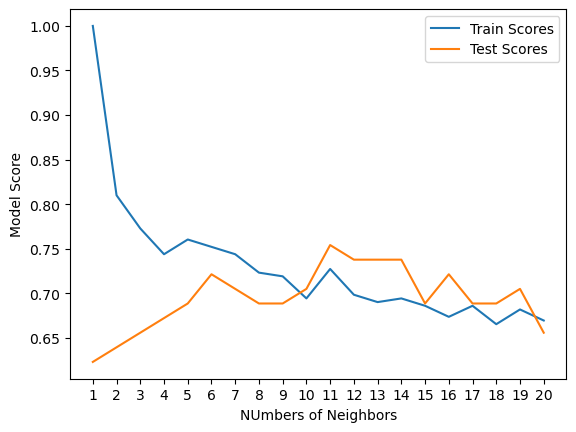

In [29]:
# now lets plot it out
plt.plot(neighbors, train_scores, label = "Train Scores")
plt.plot(neighbors, test_scores, label = "Test Scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("NUmbers of Neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [30]:
## Hyperparameter tuning with RandomizedSearchCV
# we are going to tune LogisticRegression() and RandomSearcgClassifier() ....using RandomSearchCV

In [31]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

In [43]:
# Create hyper parameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3,5,10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [37]:
## Now we have our hyperparameters grid set up for each models, let's tune them using RandomizedSearchCV

# Tune LogisticRegression()

np.random.seed(42)

# set up hyperparameter search for logisticregression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)
# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [39]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [40]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [44]:
## Now let's tune RandomForestClassifier()

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True)
# fit random hyperparameter search for RandomForestClassifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [45]:
# find the best hyperparameter
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [48]:
## Evaluate the randomized search for RandomForestClassifier()
rs_rf.score(x_test, y_test)

0.8688524590163934

In [54]:
## tuning hyperparameters using GridSearchCV
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# set up grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         log_reg_grid,
                         cv = 5,
                         verbose = True)
# fitting grid hyperparameter searh model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [55]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [58]:
## Evaluating our tuned machine learning classifier, beyond accuracy 
# ROC curve and AUC curve
# Confusion matrix
# Classification report
# Recall
# F1-score
## ... and it would be great if cross validation was used where possible

# To make comparisons and evaluate our trained model, first we need to make predictions

# Make predictions with tuned models
y_preds = gs_log_reg.predict(x_test)

y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [74]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


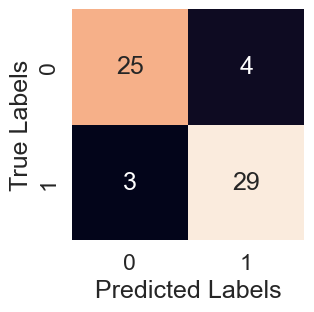

In [75]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using seaborn()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

plot_conf_mat(y_test, y_preds)   

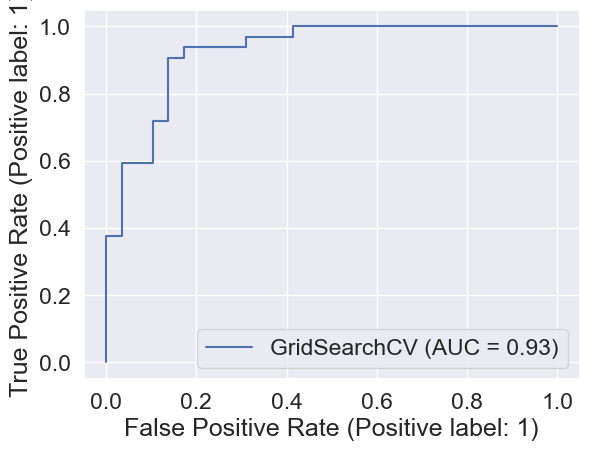

In [78]:
## Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test);

In [79]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [80]:
## lets calculate evaluation metrics using cross validation
# We're going to calculate precision, recall and f1-score of our model and to do so we'll be using "cross_val_score()"

# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [81]:
## lets create a new classifier with the best parameter
clf = LogisticRegression(C = 0.20433597178569418, solver = 'liblinear')

In [82]:
# cross validated accuracy
cv_acc = cross_val_score(clf, x, y, cv = 5, scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [84]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [85]:
# cross validated precision
cv_precision = cross_val_score(clf, x, y, cv = 5, scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [86]:
# cross validated recall
cv_recall = cross_val_score(clf, x, y, cv = 5, scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [87]:
# cross validated f1-score
cv_f1 = cross_val_score(clf, x, y, cv = 5, scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

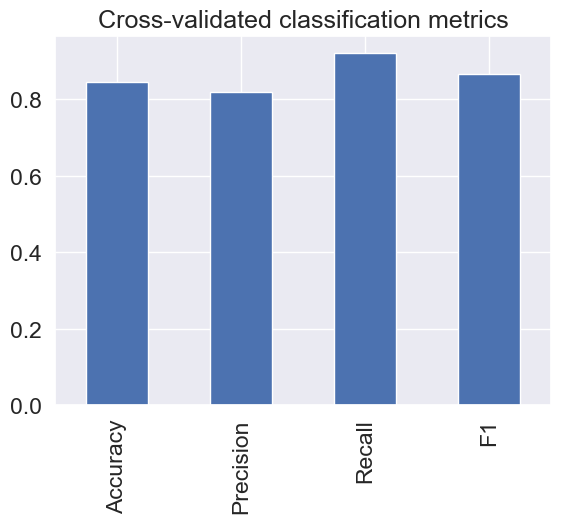

In [88]:
# visualize our cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
             "Precision":cv_precision,
             "Recall":cv_recall,
             "F1":cv_f1},
              index=[0])
cv_metrics.T.plot.bar(title = "Cross-validated classification metrics", legend = False);

In [89]:
## Feature Importance: Feature Importance is another as asking, "Which features contributed the most to the outcome of the model ?"
# And how did they contributed. Finding feature importance is different for each machine learning model
# one way to find feature importance is to search for "(MODEL NAME)feature importance"

# Let's find the feature importance for our LogisticRegression model

In [90]:
# Fit an instance of Logistic Regression
clf = LogisticRegression(C = 0.20433597178569418, solver = 'liblinear')
clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [91]:
# checking coef
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [92]:
# match coef of features to column
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

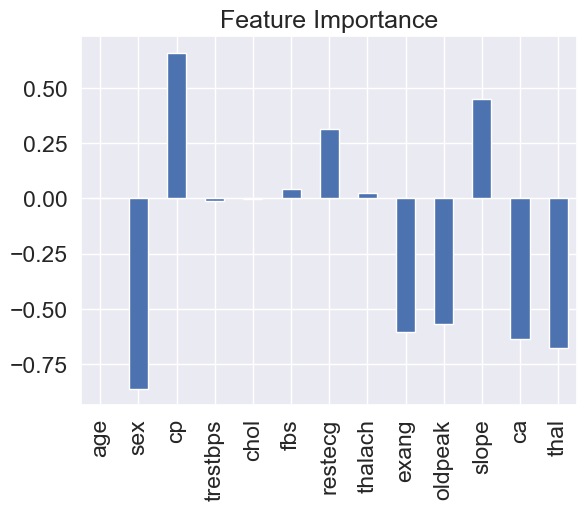

In [98]:
# lets visualize feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = "Feature Importance", legend = False);